In [5]:
%load_ext autoreload
%autoreload 2
import sys
sys.path.append('..')

import numpy as np
import torch
from baselines import *
from readerFileBased import RoutinesDataset, get_cooccurence_frequency
from encoders import TimeEncodingOptions

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [8]:
time_options = TimeEncodingOptions(None)
data = RoutinesDataset(data_path='../data/mc4schedules0208/processed', 
                        time_encoder=time_options('external'), 
                        batch_size=10,
                        only_seen_edges = False)

cooccurence_freq = get_cooccurence_frequency(data)

4753  examples in train split.
947  examples in test split.


['bathroom', 'shower', 'bathroom_cabinet', 'bathroom_counter', 'dining_room', 'knifeblock', 'trashcan', 'mat', 'bench', 'table', 'cupboard', 'kitchen_counter', 'sink', 'faucet', 'kitchen_counter', 'oven', 'dishwasher', 'coffe_maker', 'bedroom', 'bookshelf', 'sofa', 'mat', 'home_office', 'sofa', 'table', 'desk', 'tvstand', 'bookshelf', 'outside', 'washing_machine', 'stove', 'kitchen_cabinet', 'fridge', 'dresser', 'shoe_rack', 'bag', 'basket_for_clothes', 'book', 'bowl', 'cd', 'cd_player', 'chef_knife', 'chessboard', 'cloth_napkin', 'clothes_dress', 'clothes_jacket', 'clothes_pants', 'clothes_shirt', 'clothes_socks', 'clothes_underwear', 'coffee_cup', 'coffee_filter', 'conditioner', 'cookingpot', 'deck_of_cards', 'deodorant', 'dish_soap', 'dishrack', 'dishtowel', 'drinking_glass', 'drying_rack', 'face_soap', 'facial_cleanser', 'food_bread', 'food_cereal', 'food_cheese', 'food_chicken', 'food_egg', 'food_jam', 'food_peanut_butter', 'food_rice', 'food_vegetable', 'fork', 'groceries', 'grou

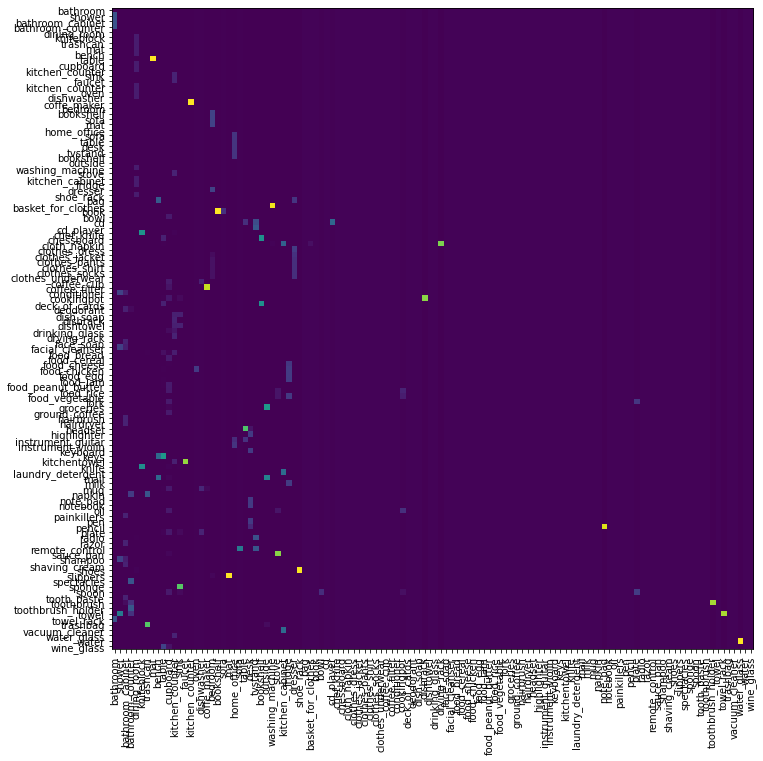

In [15]:
import matplotlib.pyplot as plt
print(data.node_classes)

def plot_matrix(matrix, ax=None, set_yticks=True):
    if ax is None:
        fig, ax = plt.subplots()
        fig.set_size_inches(matrix.size()[0]/10, matrix.size()[1]/10)
    ax.imshow(matrix.numpy())

    _ = ax.set_xticks(np.arange(len(data.node_classes))) 
    _ = ax.set_xticklabels(data.node_classes, rotation = 90)

    if set_yticks:
        _ = ax.set_yticks(np.arange(len(data.node_classes))) 
        _ = ax.set_yticklabels(data.node_classes)

plot_matrix(cooccurence_freq)

In [25]:
def step_and_plot_results(baseline, routine = None):
    if routine is None:
        routine = list(data.test)[0]
    data_in = data.test_routines.collate_fn(list(data.test))
    out = baseline.step(data_in)
    print(out.size)
    idx = out.argmax(-1)
    out_thresh = torch.nn.functional.one_hot(idx, num_classes=data_in['edges'].size()[-1])
    fig, axs = plt.subplots(1,3)
    fig.set_size_inches(18.5, 10.5)
    plot_matrix(data_in['edges'].squeeze(), axs[0])
    plot_matrix(out.squeeze(), axs[1], set_yticks = False)
    plot_matrix(out_thresh.squeeze(), axs[2], set_yticks = False)

In [26]:
s = LastSeen(cooccurence_freq)
step_and_plot_results(s)



AttributeError: 'tuple' object has no attribute 'size'

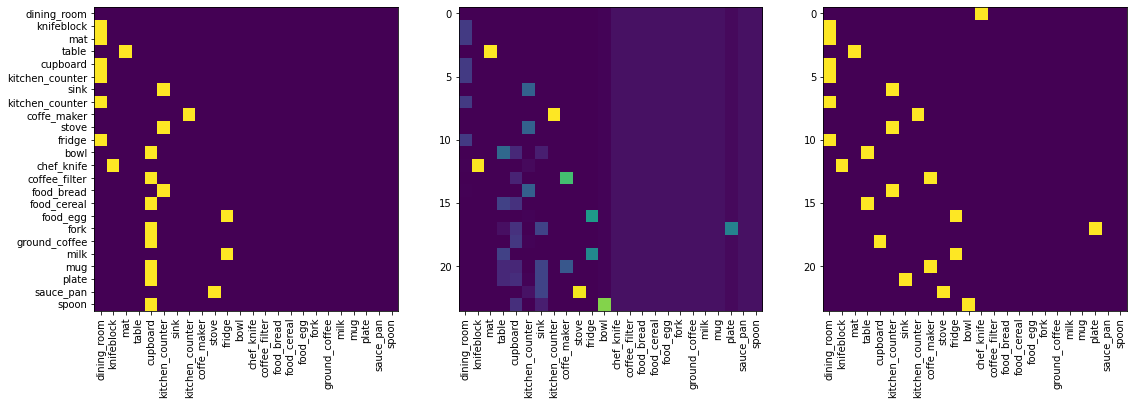

In [77]:
s = StaticSemantic(cooccurence_freq)
step_and_plot_results(s)


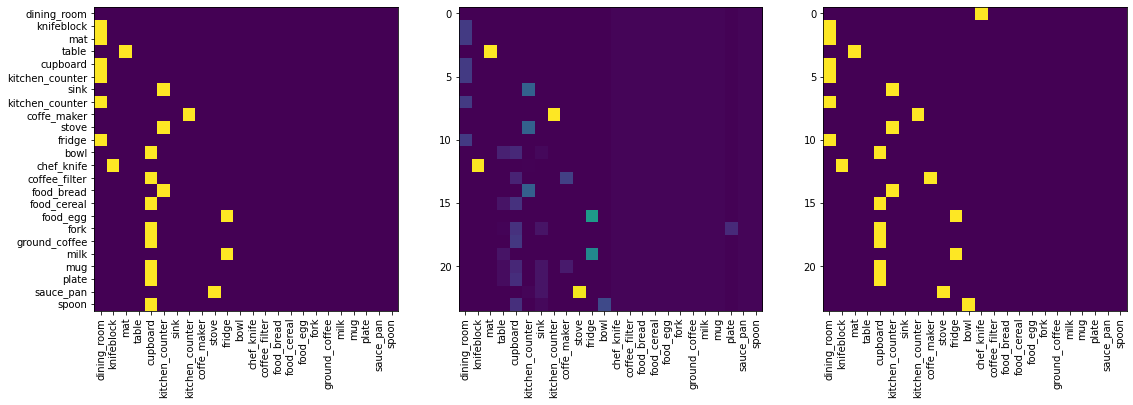

In [93]:
s = LastSeenAndStaticSemantic(cooccurence_freq, prob_change = 0.9)
step_and_plot_results(s)


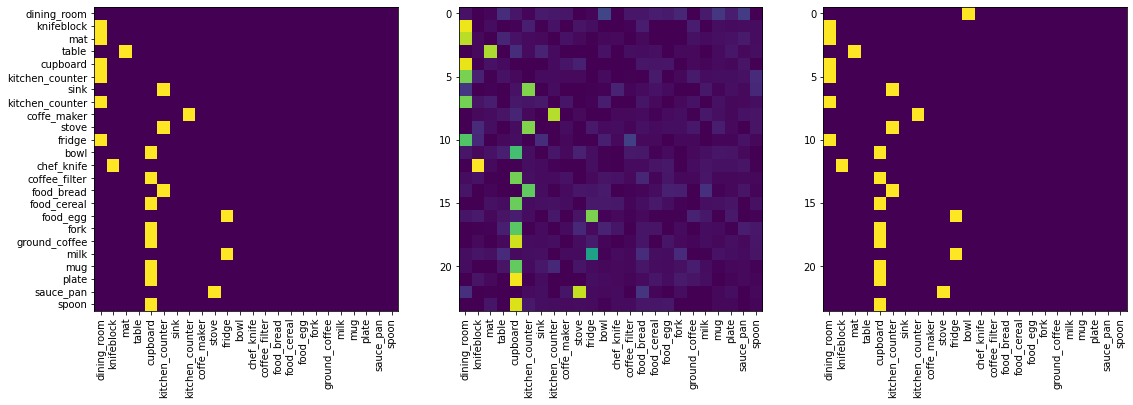

In [87]:
s = Slim(cooccurence_freq, num_particles=100, noise=0.5)
step_and_plot_results(s)
